In [7]:
### IMPORTS AND READ CSV
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Initialise dataframe with headers
col_names = ["elevation", "aspect", "slope", "horizontaltohydro", "verticaltohydro", "horizontaltoroadway", "hillshade9am", "hillshadenoon", "hillshade3pm", "horizontaltofirepoints", "wildernessareaRawah", "wildernessareaNeota", "wildernessareaComanche", "wildernessareaCache", "soil1", "soi2", "soil3", "soil4", "soil5", "soil6", "soil7", "soil8", "soil9", "soil10", "soil11", "soil12", "soil13", "soil14", "soil15", "soil16", "soil17", "soil18", "soil19", "soil20", "soil21", "soil22", "soil23", "soil24", "soil25", "soil26", "soil27", "soil28", "soil29", "soil30", "soil31", "soil32", "soil33", "soil34", "soil35", "soil36", "soil37", "soil38", "soil39", "soil40", "target"]
cover_data = pd.read_csv('covtype.data', sep=',', names=col_names)
# Output dataframe contains 8124 entries
cover_data

,elevation,aspect,slope,horizontaltohydro,verticaltohydro,horizontaltoroadway,hillshade9am,hillshadenoon,hillshade3pm,horizontaltofirepoints,...,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40,target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [8]:
### DATA CLEANING
# Remove rows with ANY null values
X1 = cover_data.dropna()
# doesn't actually do anything because all "values" are present in the dataset
# Output dataframe contains 581012 entries
X1

,elevation,aspect,slope,horizontaltohydro,verticaltohydro,horizontaltoroadway,hillshade9am,hillshadenoon,hillshade3pm,horizontaltofirepoints,...,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40,target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


<AxesSubplot:ylabel='target'>

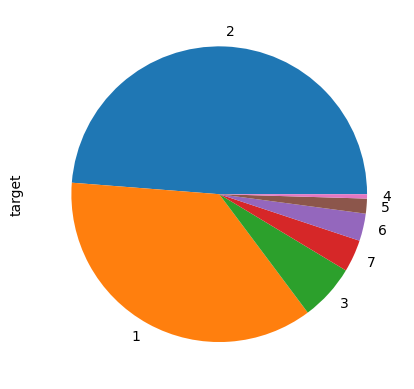

In [9]:
cover_data.target.value_counts().plot(kind="pie")

Fitting 3 folds for each of 320 candidates, totalling 960 fits


KeyboardInterrupt: 

In [ ]:
X

NameError: name 'X' is not defined

In [ ]:
Y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: target, Length: 581012, dtype: int64

In [ ]:
# Transform the training data and assign it to variable "encodedX"
#encodedX = ohe.fit_transform(X)
#encodedX

In [ ]:
# Corresponding column attributes
#ohe.categories_

In [ ]:
# For visualisation purposes, we now have 5644 samples with 98 attributes with values of either 1 or 0
#encodedX.shape

In [ ]:
### Next step, Encode the target dataset
# Currently the target is still "e" and "p", need to change to 0 and 1

# Import LabelEncoder
#from sklearn.preprocessing import LabelEncoder

# Create a new LabelEncoder
#le = LabelEncoder()

In [ ]:
# Transform the target data and assign it to variable "encodedY"
#encodedY = le.fit_transform(Y)
#encodedY

In [ ]:
# Check which label was assigned to which variable
# Based on the array returned by this bit of code, Edible (e) is assigned index value "0", while Poisonous (p) is value "1"
#le.classes_

In [ ]:
### So we have created our encodedX and encodedY
# Now it is time to split the data, lets try an 80-20 split (80% training data, 20% test data)

# Import train_test_split from sklearn
#from sklearn.model_selection import train_test_split

# Use the train_test_split function to create split the training and target data into 4 arrays (X_train, X_test, Y_train, Y_test)
#X_train, X_test, Y_train, Y_test = train_test_split(encodedX, encodedY, test_size=0.2)

(1129, 98)

(4515,)

(1129,)